# Enron Scandal Email Analysis 1

## Analyse formal CEO Kenneth Lay's email set

Analyze all his emails and identifies the senders and recipients


In [1]:
import os
from glob import glob
from email.parser import Parser
from nltk import FreqDist
from collections import Counter
from pylab import *

prepare work

In [46]:
rootdir = os.path.expanduser("~")+"/midterm/data/enron/maildir/lay-k/"

In [47]:
for directory, subdirectory, filenames in os.walk(rootdir):
    print(directory, subdirectory, len(filenames))

/Users/Rui/midterm/data/enron/maildir/lay-k/ ['_sent', 'all_documents', 'business', 'calendar', 'compaq', 'deleted_items', 'discussion_threads', 'elizabeth', 'enron', 'family', 'inbox', 'notes_inbox', 'sec_panel', 'sent', 'sent_items'] 0
/Users/Rui/midterm/data/enron/maildir/lay-k/_sent [] 261
/Users/Rui/midterm/data/enron/maildir/lay-k/all_documents [] 1127
/Users/Rui/midterm/data/enron/maildir/lay-k/business [] 2
/Users/Rui/midterm/data/enron/maildir/lay-k/calendar [] 8
/Users/Rui/midterm/data/enron/maildir/lay-k/compaq [] 1
/Users/Rui/midterm/data/enron/maildir/lay-k/deleted_items [] 1126
/Users/Rui/midterm/data/enron/maildir/lay-k/discussion_threads [] 910
/Users/Rui/midterm/data/enron/maildir/lay-k/elizabeth [] 35
/Users/Rui/midterm/data/enron/maildir/lay-k/enron [] 5
/Users/Rui/midterm/data/enron/maildir/lay-k/family [] 8
/Users/Rui/midterm/data/enron/maildir/lay-k/inbox [] 1373
/Users/Rui/midterm/data/enron/maildir/lay-k/notes_inbox [] 799
/Users/Rui/midterm/data/enron/maildir/l

There might be multiple people in 'to' & 'cc' field but always one 'from' for each email, so we need to clean up the send to list of each email

In [4]:
def clean_to_list(to_list1):
    to_list = [l.replace('\n','') for l in to_list1]
    to_list = [i.replace('\t', '') for i in to_list]
    to_list = [s.replace(' ','') for s in to_list]
    to_list = [t.split(',') for t in to_list]
    return to_list

Create another function to add each email list to root list

In [5]:
def add_to_list(to_list1, to_list):
    for e_l in to_list1:
        for l in e_l:
            to_list.append(l)
    return to_list

Create a function to analyze Kenneth's email set<br>

In [6]:
def analyze_contacts(rootdir, to_list, from_list):

    all_folders = glob(rootdir+'/*')
    
    for folder in all_folders:
        
        for emails in glob(folder+'/*'):
            
            with open(emails, 'r',encoding='latin-1') as fp:
                data = fp.read()
            ed = Parser().parsestr(data)
            
            if ed['from'] != 'kenneth.lay@enron.com':            
                from_list.append(ed['from']) 
         
            for send_to in [ed['to']]:
                if send_to != None:
                        to_list = add_to_list(clean_to_list([send_to]), to_list)
            
            for cc_to in [ed['cc']]:
                if cc_to != None:
                        to_list = add_to_list(clean_to_list([cc_to]), to_list)

In [7]:
to_list = []
from_list = []
analyze_contacts(rootdir, to_list, from_list)
to_list = [s for s in to_list if s != 'kenneth.lay@enron.com']

In [8]:
print("Top twenty recipient of Kenneth are:")
print(Counter(to_list).most_common(20))

Top twenty recipient of Kenneth are:
[('klay@enron.com', 1954), ('rosalee.fleming@enron.com', 456), ('jeff.skilling@enron.com', 397), ('mark.koenig@enron.com', 333), ('mark.frevert@enron.com', 331), ('steven.kean@enron.com', 329), ('greg.whalley@enron.com', 328), ('mike.mcconnell@enron.com', 279), ('jeffrey.mcmahon@enron.com', 266), ('john.sherriff@enron.com', 264), ('cliff.baxter@enron.com', 256), ('cindy.olson@enron.com', 221), ('liz.taylor@enron.com', 196), ('andrew.fastow@enron.com', 192), ('joseph.sutton@enron.com', 186), ('james.derrick@enron.com', 185), ('sherri.sera@enron.com', 183), ('rebecca.mcdonald@enron.com', 178), ('richard.causey@enron.com', 178), ('stanley.horton@enron.com', 176)]


In [9]:
print("Top twenty people sending email to Kenneth are:")
print(Counter(from_list).most_common(20))

Top twenty people sending email to Kenneth are:
[('rosalee.fleming@enron.com', 856), ('brown_mary_jo@lilly.com', 82), ('leonardo.pacheco@enron.com', 78), ('savont@email.msn.com', 66), ('tori.wells@enron.com', 58), ('elizabeth.davis@compaq.com', 50), ('katherine.brown@enron.com', 47), ('no.address@enron.com', 47), ('mrslinda@lplpi.com', 40), ('lizard_ar@yahoo.com', 36), ('karen.denne@enron.com', 35), ('svarga@kudlow.com', 34), ('elizabeth.lay@enron.com', 33), ('jeffrey.garten@yale.edu', 32), ('rob.bradley@enron.com', 32), ('enron.announcements@enron.com', 30), ('joe.hillings@enron.com', 28), ('unwire-listadmin@client-mail.com', 27), ('shea_dugger@i2.com', 26), ('perfmgmt@enron.com', 25)]


Simple graphs showing the email frequency for each contact

klay@enron.com seems to be another email address of Kenneth himself, I'll remove this email as well

In [12]:
to_list = [s for s in to_list if s != 'klay@enron.com']

In [13]:
result_send_list = Counter(to_list).most_common(len(to_list))
len(result_send_list)

5426

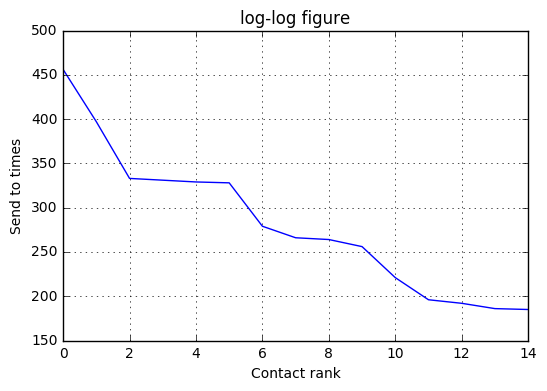

In [14]:
contact_list = []
send_to_list = []

a = 0
while a < 15:
    contact_list.append(a)
    send_to_list.append(result_send_list[a][1])
    a = a + 1
    
plot(contact_list, send_to_list, linewidth=1.0)
xlabel('Contact rank')
ylabel('Send to times')
title('log-log figure')
grid(True)
show()

In [15]:
result_from_list = Counter(from_list).most_common(len(from_list))
len(result_from_list)

2199

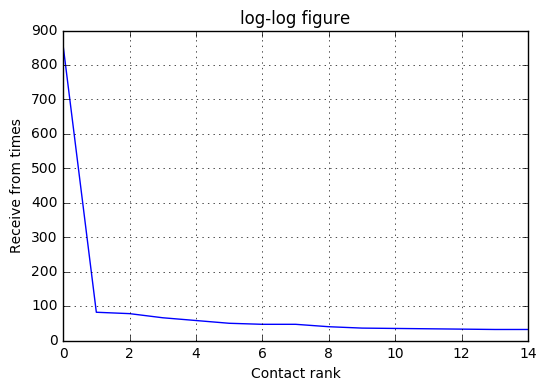

In [16]:
contact_list = []
receive_from_list = []

a = 0
while a < 15:
    contact_list.append(a)
    receive_from_list.append(result_from_list[a][1])
    a = a + 1
    
plot(contact_list, receive_from_list, linewidth=1.0)
xlabel('Contact rank')
ylabel('Receive from times')
title('log-log figure')
grid(True)
show()